In [1]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [2]:
# 1. Augmentation
    # 1. Dynamic
    # 2. Static
# 2. Segmentation
# 3. Anotation

In [3]:
# # Overfitting
#     1.  EarlyStoping
#     2. Dropout
#     3. Regularization

In [4]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}

In [5]:
print(classNameslabels)

{'cats': 0, 'dogs': 1}


In [6]:
print(len(classNameslabels))

2


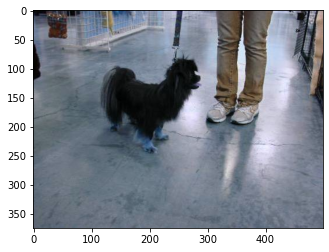

In [7]:
# H/W -- Split the file name and extrat the class names 
imageData = cv2.imread("dataset/training_set/dogs/dog.1000.jpg")
plt.imshow(imageData)
plt.show()

In [8]:
print(imageData.shape)

(375, 499, 3)


In [9]:
image_shape = (128, 128)

In [10]:
'''
if filename =


'''

'\nif filename =\n\n\n'

In [11]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["dataset/training_set/", "dataset/test_set/"]
    #Store data into the list with their paths
    imagedataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image data
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imagedataOutput.append((images, labels))
    
    return imagedataOutput

In [12]:
datasetLoaderFromDirectory()

Counting : dataset/training_set/


100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 833.00it/s]


Counting : dataset/test_set/


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 678.59it/s]


[(array([[[[250., 218., 231.],
           [245., 213., 223.],
           [241., 209., 214.],
           ...,
           [102.,  78.,  73.],
           [102.,  78.,  74.],
           [107.,  83.,  80.]],
  
          [[241., 214., 222.],
           [238., 207., 215.],
           [238., 202., 208.],
           ...,
           [ 99.,  81.,  74.],
           [102.,  83.,  77.],
           [103.,  86.,  79.]],
  
          [[234., 205., 209.],
           [231., 198., 203.],
           [231., 191., 195.],
           ...,
           [ 93.,  78.,  71.],
           [102.,  87.,  80.],
           [105.,  90.,  83.]],
  
          ...,
  
          [[139.,  49., 137.],
           [136.,  50., 136.],
           [137.,  53., 139.],
           ...,
           [151., 135., 138.],
           [146., 130., 133.],
           [155., 138., 142.]],
  
          [[140.,  50., 138.],
           [141.,  55., 142.],
           [130.,  48., 133.],
           ...,
           [150., 134., 137.],
           [147., 

In [13]:
(train_image, train_labesl), (test_image, test_labels) = shuffle(datasetLoaderFromDirectory())

Counting : dataset/training_set/


100%|██████████████████████████████████████| 4000/4000 [00:04<00:00, 843.77it/s]


Counting : dataset/test_set/


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 754.20it/s]


In [14]:
(train_image, train_labels), (test_image, test_labels) = datasetLoaderFromDirectory()

Counting : dataset/training_set/


100%|██████████████████████████████████████| 4000/4000 [00:05<00:00, 749.48it/s]


Counting : dataset/test_set/


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 688.01it/s]


In [15]:
train_images, train_labels = shuffle(train_image, train_labels, random_state = 26)

In [16]:
help(shuffle)

Help on function shuffle in module sklearn.utils:

shuffle(*arrays, random_state=None, n_samples=None)
    Shuffle arrays or sparse matrices in a consistent way.
    
    This is a convenience alias to ``resample(*arrays, replace=False)`` to do
    random permutations of the collections.
    
    Parameters
    ----------
    *arrays : sequence of indexable data-structures
        Indexable data-structures can be arrays, lists, dataframes or scipy
        sparse matrices with consistent first dimension.
    
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for shuffling
        the data.
        Pass an int for reproducible results across multiple function calls.
        See :term:`Glossary <random_state>`.
    
    n_samples : int, default=None
        Number of samples to generate. If left to None this is
        automatically set to the first dimension of the arrays.  It should
        not be larger than the length of arr

In [17]:
train_labels[5]

1.0

In [18]:
_, trainImageLabelInfo = np.unique(train_labels, return_counts=True)
_, testImageLabelInfo = np.unique(test_labels, return_counts = True)

In [19]:
print("Train Image Label information for 0 Class: ", trainImageLabelInfo[0])
print("Train Image Label information for 1 Class: ", trainImageLabelInfo[1])

print("---------------------------------------------------")

print("Test Image Label information for 0 Class: ", testImageLabelInfo[0])
print("Test Image Label information for 1 Class: ", testImageLabelInfo[1])

Train Image Label information for 0 Class:  4000
Train Image Label information for 1 Class:  4000
---------------------------------------------------
Test Image Label information for 0 Class:  1000
Test Image Label information for 1 Class:  1000


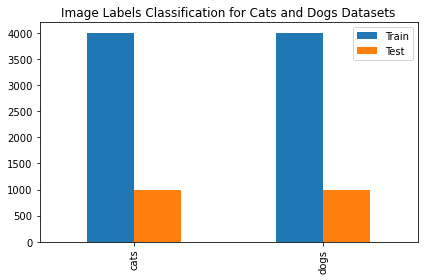

In [20]:
# Creating Dataframe for stroing image labels metadata
# Using Dictionary concept

pd.DataFrame({"Train":trainImageLabelInfo,
            "Test": testImageLabelInfo}, 
             index = classNames
            ).plot.bar()
# plt.plot()
# plt.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()

#### Home Work: Create a Pie chart using above concept

In [21]:
# Read one image features
imageFeature = train_images[0] # Image feature value should be in range between [0, 255]
#np.unique(imageFeature)
len(np.unique(imageFeature))

240

In [22]:
# Scaleing image featues 
train_images = train_images/255.0
test_image = test_image/255.0

In [23]:
#train_images[0]
#np.unique(train_images[0])
len(np.unique(train_images[0]))

240

In [24]:
#train_images.shape[0]
#np.random.randint(train_images.shape[0])
train_images.shape # (8000, 128, 128, 3) --> (Number of Image, Image_W, Image_H, Number of Color channle)

(8000, 128, 128, 3)

In [25]:
#train_labels[345]

In [26]:
# Now Read an image after Scalling
def ImageVisualization(classNames, imagePath, imagelabel):
    #Create an index for indivudual Image
    index = np.random.randint(imagePath.shape[0]) # Index always int
    
    plt.figure()# Define Frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    
    plt.title("Index of this Image is: {}".format(index) + " And Class is : "+classNames[int(imagelabel[index])])
    plt.show()

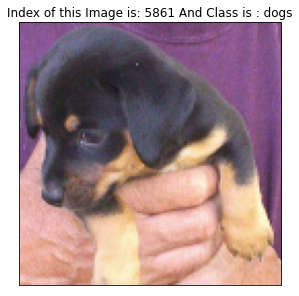

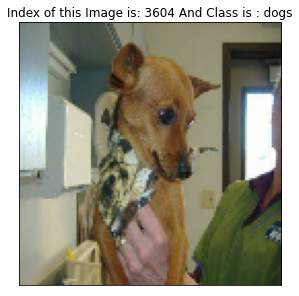

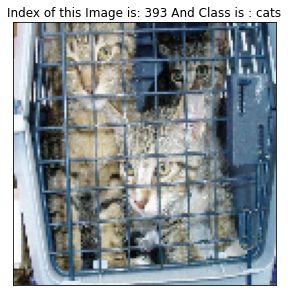

In [27]:
# Home Work: + and Actual is Class Names

for i in range(1, 4):
    ImageVisualization(classNames, train_images, train_labels)

In [28]:
# Home Work: Visualize Image at shape of (3, 3)
# Now Read an image after Scalling
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

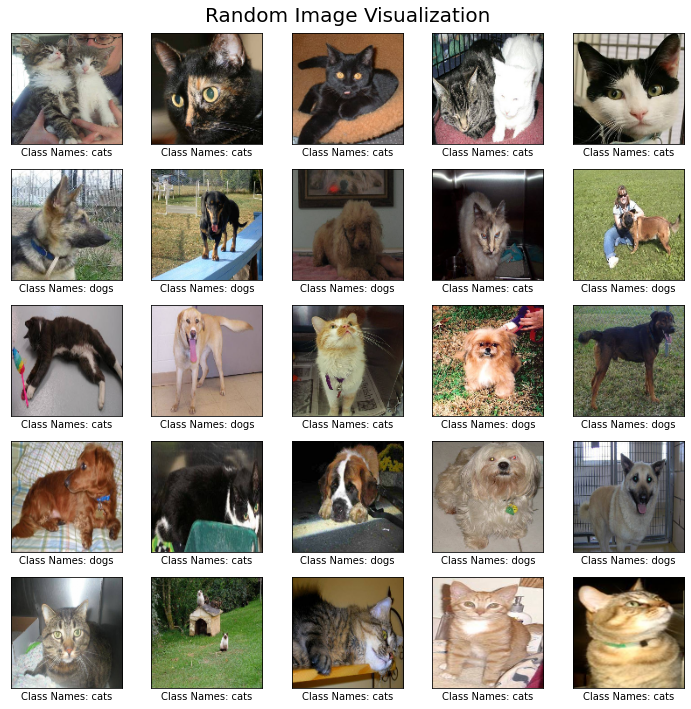

In [29]:
ImageVisualization2(classNames, train_images, train_labels)

In [30]:
train_images.shape

(8000, 128, 128, 3)

In [31]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])

2022-08-17 12:13:57.016059: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-17 12:13:57.018044: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

In [33]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

In [34]:
modelData = model.fit(train_images,
                     train_labels,
                      epochs = 10,
                     batch_size = 128,
                     validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 360s 56ms/sample - loss: 0.7059 - accuracy: 0.5272 - val_loss: 0.6912 - val_accuracy: 0.5138
Epoch 2/10
6400/6400 [==============================] - 358s 56ms/sample - loss: 0.6704 - accuracy: 0.5788 - val_loss: 0.6109 - val_accuracy: 0.6550
Epoch 3/10
6400/6400 [==============================] - 365s 57ms/sample - loss: 0.6089 - accuracy: 0.6689 - val_loss: 0.5671 - val_accuracy: 0.7006
Epoch 4/10
6400/6400 [==============================] - 362s 57ms/sample - loss: 0.5625 - accuracy: 0.7086 - val_loss: 0.5229 - val_accuracy: 0.7394
Epoch 5/10
6400/6400 [==============================] - 356s 56ms/sample - loss: 0.5079 - accuracy: 0.7478 - val_loss: 0.4839 - val_accuracy: 0.7656
Epoch 6/10
6400/6400 [==============================] - 358s 56ms/sample - loss: 0.4694 - accuracy: 0.7702 - val_loss: 0.4449 - val_accuracy: 0.7894
Epoch 7/10
6400/6400 [==============================] - 35

In [44]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

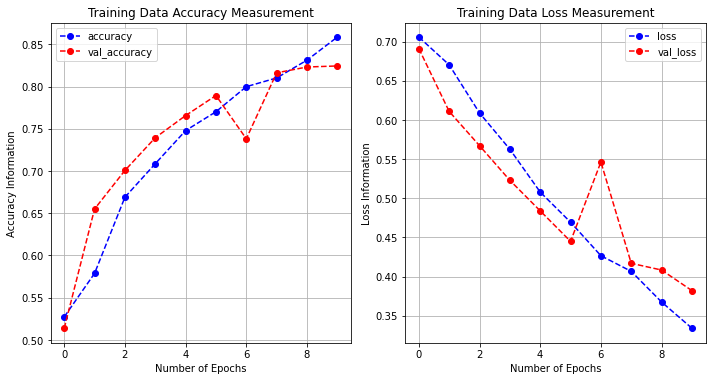

In [45]:
accuracy_and_loss_Plot(modelData)

In [46]:
testLoss = model.evaluate(test_image, test_labels)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

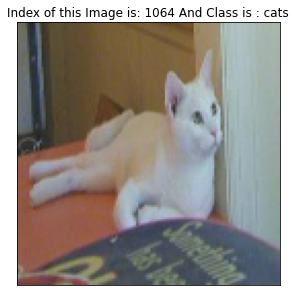

In [47]:
predictedData = model.predict(test_image)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(classNames, test_image, predictedDataLabels)

In [48]:
# # Home Work: + and Actual is Class Names
# for i in range(1, 10):
#     ImageVisualization(classNames, test_image, predictedDataLabels)

In [49]:
def missClassification(classNames, ImageData, ImageLabels, predictedDataLabels):
    
    result = (ImageLabels == predictedDataLabels)
    #print(result)
    missClass = np.where(result == 0)
    #print(int(missClass))
    
    missClassImage = imageData[missClass]
    missClasslabels = predictedDataLabels[missClass]
    
    print("Miss Classification Image Data is: ")
    ImageVisualization2(classNames, missClassImage, missClasslabels)

In [50]:
missClassification(classNames, test_image, test_labels, predictedDataLabels)

IndexError: index 382 is out of bounds for axis 0 with size 375

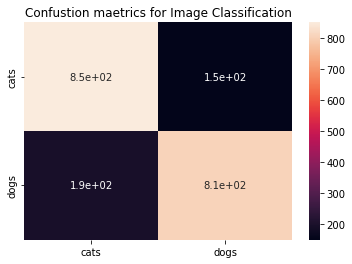

In [52]:
Cm = confusion_matrix(test_labels, predictedDataLabels)
ax = plt.axes()
sns.heatmap(Cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=classNames,
           yticklabels=classNames, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()